In [1]:
library(plyr)
library(arulesViz)     #visualizing Association Rules and Frequent Itemsets
library(arulesViz)  #Mining Association Rules and Frequent Itemsets

Warning message:
"package 'plyr' was built under R version 3.6.3"Warning message:
"package 'arulesViz' was built under R version 3.6.3"Loading required package: arules
Warning message:
"package 'arules' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"
Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



In [17]:
groceries=read.csv("Groceries_dataset (2).csv")  #loading dataset

In [18]:
head(groceries)  #first 6 rows

Member_number,Date,itemDescription
1808,7/21/2015,tropical fruit
2300,9/19/2015,pip fruit
4941,2/14/2015,rolls/buns
3803,12/23/2015,pot plants
2762,3/20/2015,whole milk
1340,2/24/2015,citrus fruit


In [19]:
tail(groceries)    #last 6 rows

,Member_number,Date,itemDescription
38760,1146,12/7/2014,waffles
38761,4796,2/3/2014,Instant food products
38762,4376,7/12/2014,rolls/buns
38763,3364,6/5/2014,oil
38764,4471,8/10/2014,sliced cheese
38765,1510,3/12/2014,fruit/vegetable juice


In [20]:
str(groceries)  #structure of features

'data.frame':	38765 obs. of  3 variables:
 $ Member_number  : int  1808 2300 4941 3803 2762 1340 2193 1997 4736 1959 ...
 $ Date           : Factor w/ 728 levels "1/1/2014","1/1/2015",..: 572 690 256 216 326 278 374 572 572 348 ...
 $ itemDescription: Factor w/ 167 levels "abrasive cleaner",..: 156 109 122 112 165 29 7 55 14 63 ...


In [21]:
dim(groceries)  #dimension of dataset

[1] 38765     3

In [22]:
summary(groceries)  #statistical summary

 Member_number          Date               itemDescription 
 Min.   :1000   1/21/2015 :   96   whole milk      : 2502  
 1st Qu.:2002   7/21/2015 :   93   other vegetables: 1898  
 Median :3005   11/29/2015:   92   rolls/buns      : 1716  
 Mean   :3004   8/8/2015  :   92   soda            : 1514  
 3rd Qu.:4007   4/30/2015 :   91   yogurt          : 1334  
 Max.   :5000   3/26/2015 :   88   root vegetables : 1071  
                (Other)   :38213   (Other)         :28730  

In [47]:
sum(is.na(groceries))  #checking for null values

[1] 0

In [23]:
groceries$Date=as.Date(groceries$Date, format=("%m/%d/%Y"))   #converting Date to date

In [24]:
groceries$Member_number=as.numeric(groceries$Member_number)   #converting Member_number to number

In [25]:
head(groceries)    #first 6 rows

Member_number,Date,itemDescription
1808,2015-07-21,tropical fruit
2300,2015-09-19,pip fruit
4941,2015-02-14,rolls/buns
3803,2015-12-23,pot plants
2762,2015-03-20,whole milk
1340,2015-02-24,citrus fruit


In [26]:
#aggregating itemDescription based on Member_number and Date with "," seperator
groceries= ddply(groceries, c("Member_number","Date"), function(df1)paste(df1$itemDescription, collapse = ","))

In [29]:
colnames(groceries) <- c("Member_number","Date","itemList")  # setting a name for the third column

In [30]:
head(groceries)    #first 6 rows and seeing the change

Member_number,Date,itemList
1000,2014-06-24,"whole milk,pastry,salty snack"
1000,2015-03-15,"sausage,whole milk,semi-finished bread,yogurt"
1000,2015-05-27,"soda,pickled vegetables"
1000,2015-07-24,"canned beer,misc. beverages"
1000,2015-11-25,"sausage,hygiene articles"
1001,2014-07-02,"sausage,whole milk,rolls/buns"


In [32]:
#Save groceries data frame in your pc
write.csv(groceries, file = 'groceries_itemlist.csv', quote = FALSE, row.names = TRUE)

In [34]:
#Construct transaction Object
TransData = read.transactions(file='groceries_itemlist.csv', rm.duplicates= TRUE, format="basket",sep=",",cols=1)

distribution of transactions with duplicates:
items
  1   2   3   4 
662  39   5   1 


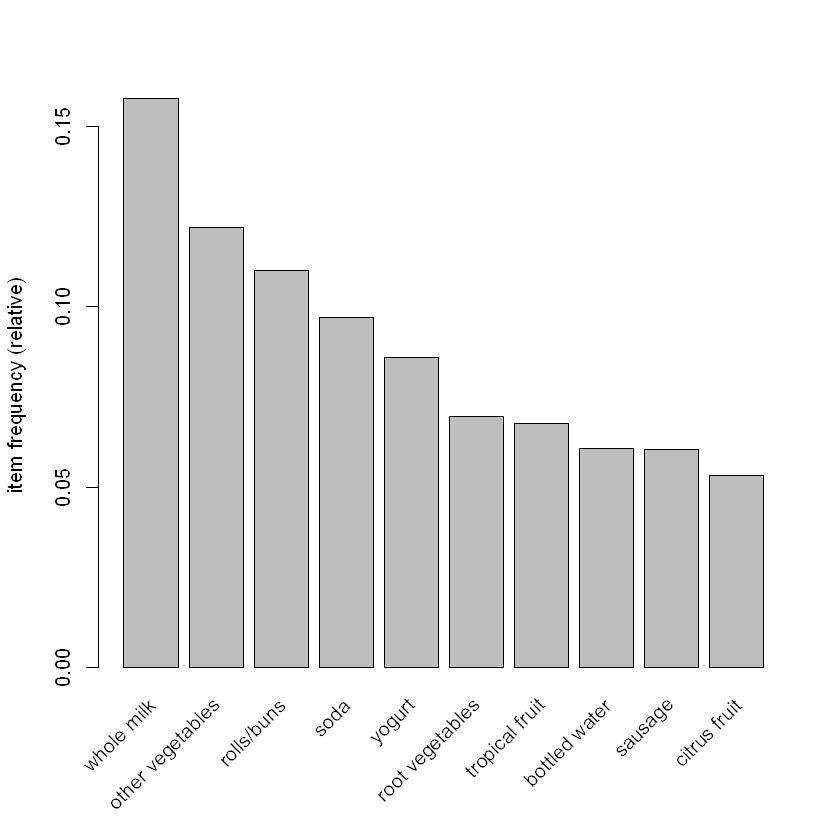

In [41]:
# Displays itemFrequency
itemFrequencyPlot(TransData, topN = 10)

In [55]:
#Apriori algorithm Implementation 
basket_rules=apriori(TransData, parameter = list(minlen=1, sup = 0.001, conf = 0.05))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.05    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4796 item(s), 14964 transaction(s)] done [0.03s].
sorting and recoding items ... [804 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.01s].
writing ... [461 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [56]:
length(basket_rules)

[1] 461

In [38]:
summary(basket_rules)

set of 450 rules

rule length distribution (lhs + rhs):sizes
  2   3 
423  27 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    2.00    2.00    2.06    2.00    3.00 

summary of quality measures:
    support           confidence         coverage             lift       
 Min.   :0.001002   Min.   :0.05000   Min.   :0.005346   Min.   :0.5195  
 1st Qu.:0.001270   1st Qu.:0.06397   1st Qu.:0.015972   1st Qu.:0.7673  
 Median :0.001938   Median :0.08108   Median :0.023590   Median :0.8350  
 Mean   :0.002760   Mean   :0.08759   Mean   :0.033723   Mean   :0.8859  
 3rd Qu.:0.003341   3rd Qu.:0.10482   3rd Qu.:0.043705   3rd Qu.:0.9601  
 Max.   :0.014836   Max.   :0.25581   Max.   :0.157912   Max.   :2.1831  
     count      
 Min.   : 15.0  
 1st Qu.: 19.0  
 Median : 29.0  
 Mean   : 41.3  
 3rd Qu.: 50.0  
 Max.   :222.0  

mining info:
      data ntransactions support confidence
 TransData         14964   0.001       0.05

In [40]:
#Display the top 20 rules with the highest lift 
inspect(head(sort(basket_rules,by="lift"),20))

     lhs                        rhs               support     confidence
[1]  {whole milk,yogurt}     => {sausage}         0.001470195 0.13173653
[2]  {sausage,whole milk}    => {yogurt}          0.001470195 0.16417910
[3]  {specialty chocolate}   => {citrus fruit}    0.001403368 0.08786611
[4]  {sausage,yogurt}        => {whole milk}      0.001470195 0.25581395
[5]  {flour}                 => {tropical fruit}  0.001069233 0.10958904
[6]  {beverages}             => {sausage}         0.001537022 0.09274194
[7]  {soda,whole milk}       => {sausage}         0.001069233 0.09195402
[8]  {napkins}               => {pastry}          0.001737503 0.07854985
[9]  {processed cheese}      => {root vegetables} 0.001069233 0.10526316
[10] {hard cheese}           => {pip fruit}       0.001069233 0.07272727
[11] {soft cheese}           => {yogurt}          0.001269714 0.12666667
[12] {curd}                  => {sausage}         0.002940390 0.08730159
[13] {detergent}             => {yogurt}          0

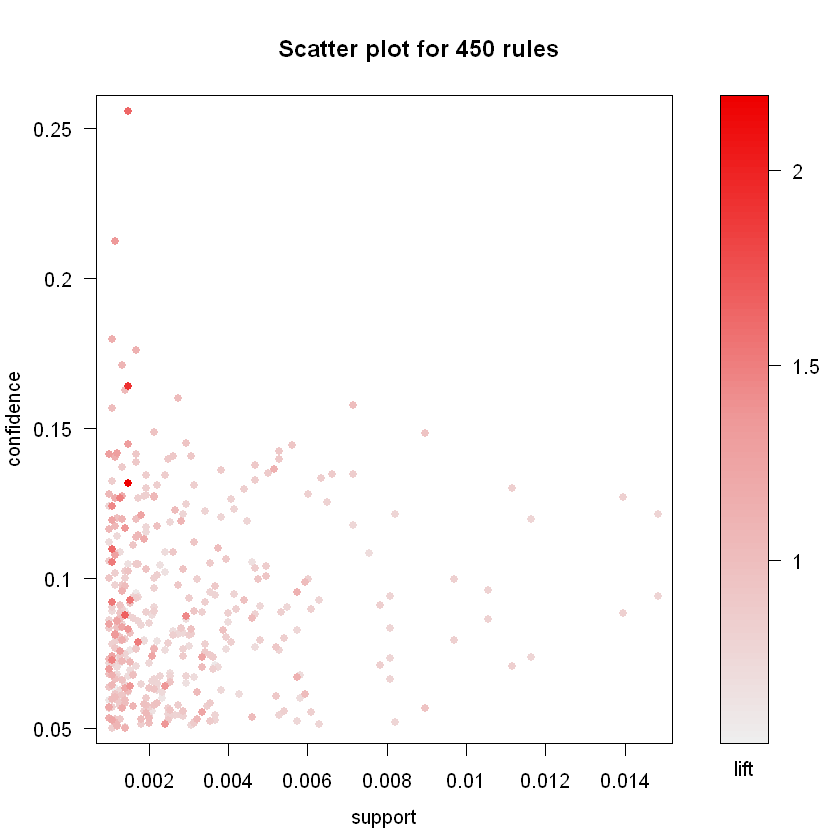

In [44]:
# Displays scatterplot
plot(basket_rules, method="scatterplot", jitter = 0)

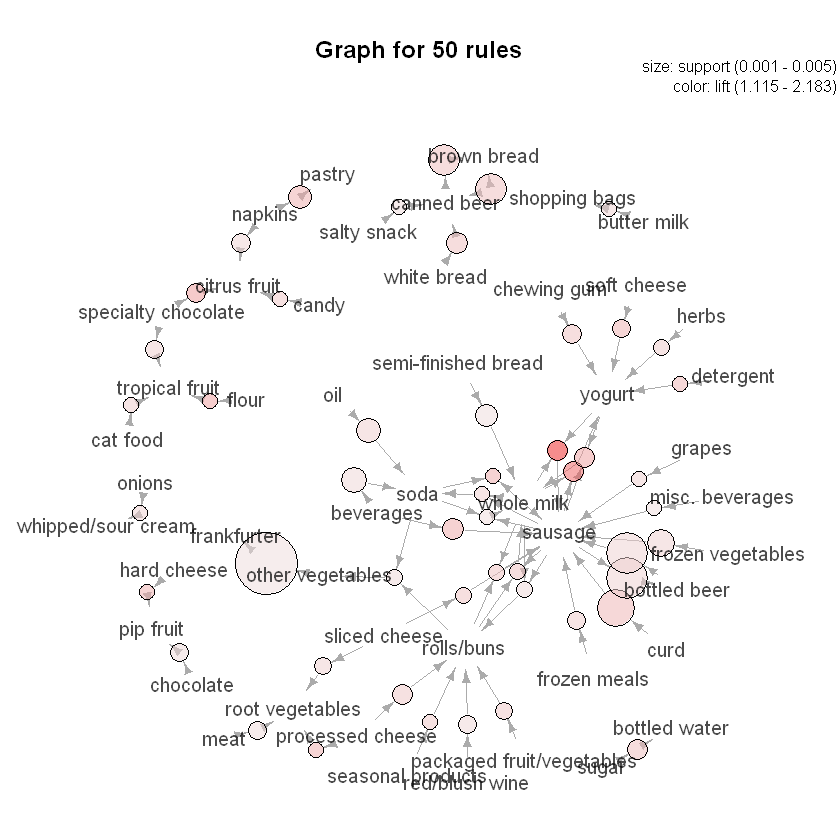

In [45]:
#Visualizing the top 50 rules with the highest lift and plot them
plot(head(sort(basket_rules,by="lift"),50), method="graph")

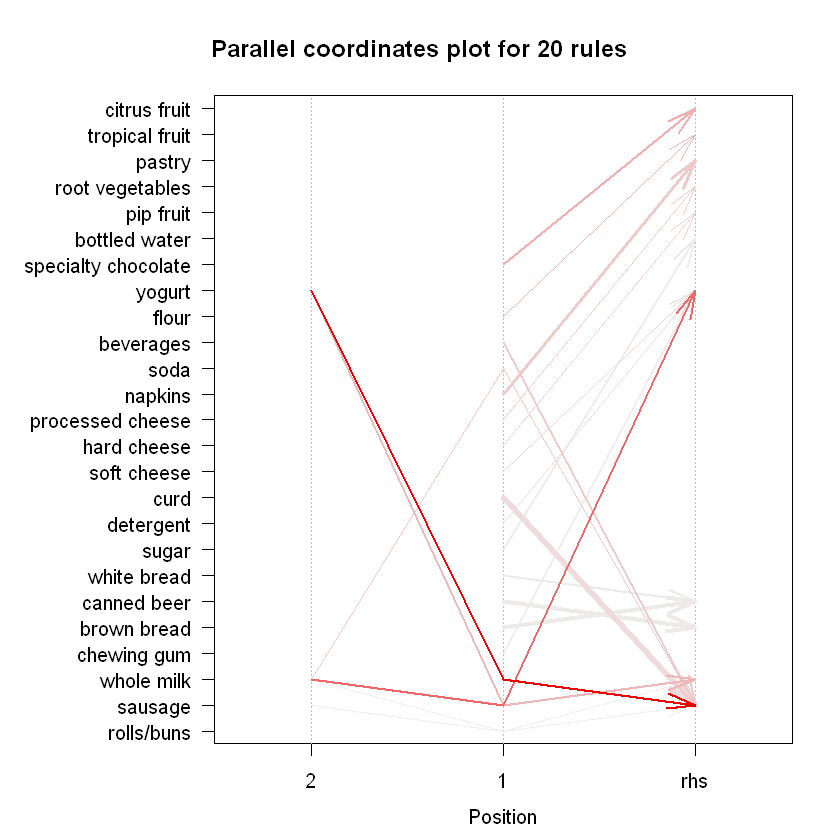

In [46]:
#Visualizing the top 20 rules with the highest lift
plot(head(sort(basket_rules,by="lift"),20), method="paracoord")